# Figure Preparation for Presentation

This notebook creates figures for presentation slides. Not part of the tutorial sequence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
import requests

# Set seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook")

## Load Dataset

In [2]:
# Load the household power consumption dataset
data_path = Path('data/household_power_consumption.txt')

df = pd.read_csv(
    data_path,
    sep=';',
    na_values='?',
    low_memory=False
)

# Combine Date and Time columns and convert to datetime
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df = df.drop(columns=['Date', 'Time'])
df = df.set_index('datetime')

# Drop rows with missing values
df = df.dropna()

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
df.head()

Dataset shape: (2049280, 7)
Date range: 2006-12-16 17:24:00 to 2010-11-26 21:02:00


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Plot Three Days of Electrical Power Consumption

In [3]:
# Select three consecutive days from the dataset
# Using June 2020 to match solar and wind data
start_date = '2010-06-15'
end_date = '2010-06-18'  # 3 days: 15th, 16th, 17th

three_days = df.loc[start_date:end_date, 'Global_active_power']

print(f"Plotting {len(three_days)} measurements over 3 days")
print(f"From {three_days.index[0]} to {three_days.index[-1]}")

Plotting 5760 measurements over 3 days
From 2010-06-15 00:00:00 to 2010-06-18 23:59:00


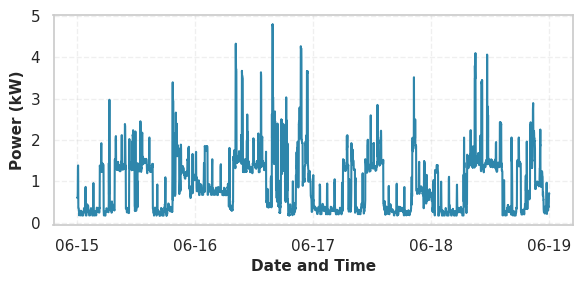

In [4]:
# Create the plot
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(three_days.index, three_days.values, linewidth=1.5, color='#2E86AB')

ax.set_xlabel('Date and Time', fontsize=11, fontweight='bold')
ax.set_ylabel('Power (kW)', fontsize=11, fontweight='bold')

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Format x-axis to show dates nicely
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Optionally save the figure
# fig.savefig('three_days_power_consumption.png', dpi=300, bbox_inches='tight')

## Plot Solar Irradiance Data (Real PVGIS Data)

Download real solar irradiance data from EU PVGIS for a location with excellent solar resource (e.g., Seville, Spain).

In [5]:
# Download solar irradiance data from PVGIS
# Location: Seville, Spain (37.39°N, 5.98°W) - excellent solar resource

lat = 37.39  # Seville, Spain
lon = -5.98
year = 2020  # Use 2020 data

# PVGIS API endpoint for hourly radiation data
url = f"https://re.jrc.ec.europa.eu/api/v5_2/seriescalc?lat={lat}&lon={lon}&startyear={year}&endyear={year}&pvcalculation=0&outputformat=csv&browser=0"

print(f"Downloading solar irradiance data for Seville, Spain ({lat}°N, {lon}°W)...")

# Read directly from URL with proper parsing
pvgis_df = pd.read_csv(url, sep=",", skiprows=8,
                       skipfooter=10, engine='python',
                       date_format="%Y%m%d:%H%M",
                       parse_dates=True,
                       index_col=0)

print(f"✓ Downloaded {len(pvgis_df)} hourly measurements")
print(f"Columns: {list(pvgis_df.columns)}")
print(pvgis_df.head())

✓ Downloaded 8784 hourly measurements
Columns: ['G(i)', 'H_sun', 'T2m', 'WS10m', 'Int']
                     G(i)  H_sun   T2m  WS10m  Int
time                                              
2020-01-01 00:09:00   0.0    0.0  8.17   1.86  0.0
2020-01-01 01:09:00   0.0    0.0  7.65   1.86  0.0
2020-01-01 02:09:00   0.0    0.0  7.28   1.86  0.0
2020-01-01 03:09:00   0.0    0.0  6.94   1.93  0.0
2020-01-01 04:09:00   0.0    0.0  6.63   2.00  0.0
✓ Downloaded 8784 hourly measurements
Columns: ['G(i)', 'H_sun', 'T2m', 'WS10m', 'Int']
                     G(i)  H_sun   T2m  WS10m  Int
time                                              
2020-01-01 00:09:00   0.0    0.0  8.17   1.86  0.0
2020-01-01 01:09:00   0.0    0.0  7.65   1.86  0.0
2020-01-01 02:09:00   0.0    0.0  7.28   1.86  0.0
2020-01-01 03:09:00   0.0    0.0  6.94   1.93  0.0
2020-01-01 04:09:00   0.0    0.0  6.63   2.00  0.0


In [6]:
# Process and select three days of data
# Using consistent dates: June 15-17, 2020
start_date_solar = '2020-06-15'
end_date_solar = '2020-06-18'  # 3 days: 15th, 16th, 17th

# Get Global Horizontal Irradiance (G(h)) column
irradiance_col = 'G(h)' if 'G(h)' in pvgis_df.columns else pvgis_df.columns[0]

solar_three_days = pvgis_df.loc[start_date_solar:end_date_solar, irradiance_col]

print(f"Selected {len(solar_three_days)} measurements over 3 days")
print(f"From {solar_three_days.index[0]} to {solar_three_days.index[-1]}")
print(f"Using column: {irradiance_col}")
print(f"Mean irradiance: {solar_three_days.mean():.1f} W/m²")
print(f"Max irradiance: {solar_three_days.max():.1f} W/m²")

Selected 96 measurements over 3 days
From 2020-06-15 00:09:00 to 2020-06-18 23:09:00
Using column: G(i)
Mean irradiance: 349.0 W/m²
Max irradiance: 1005.0 W/m²


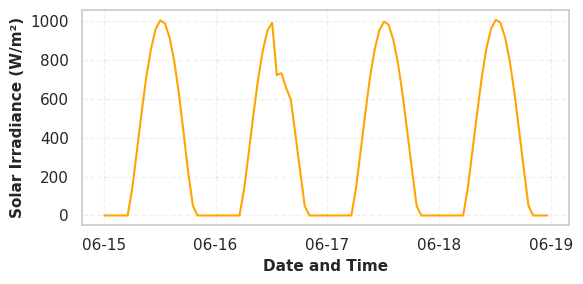

In [7]:
# Create the solar irradiance plot
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(solar_three_days.index, solar_three_days.values, linewidth=1.5, color='#FFA500')

ax.set_xlabel('Date and Time', fontsize=11, fontweight='bold')
ax.set_ylabel('Solar Irradiance (W/m²)', fontsize=11, fontweight='bold')

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Format x-axis to show dates nicely
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Optionally save the figure
# fig.savefig('three_days_solar_irradiance.png', dpi=300, bbox_inches='tight')

## Plot Wind Speed Data (Open-Meteo API)

Download real wind speed data from Open-Meteo API for the same location (free, no API key required).

In [8]:
# Download wind speed data from Open-Meteo
# Using the same dates as solar and power data for consistency
# Open-Meteo provides free historical weather data

# Use coordinates close to a good wind location (e.g., coastal Spain)
lat_wind = 43.38  # Northern Spain coast (good wind resource)
lon_wind = -3.00
start_date_wind = '2020-06-15'
end_date_wind = '2020-06-17'  # 3 days: 15th, 16th, 17th

# Open-Meteo historical weather API
wind_url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat_wind}&longitude={lon_wind}&start_date={start_date_wind}&end_date={end_date_wind}&hourly=wind_speed_10m&timezone=auto"

print(f"Downloading wind speed data for Northern Spain ({lat_wind}°N, {lon_wind}°W)...")
print(f"Dates: {start_date_wind} to {end_date_wind}")

# Download and parse JSON response
import json
response = requests.get(wind_url)
wind_data = response.json()

# Extract data and create DataFrame
if 'hourly' in wind_data:
    wind_df = pd.DataFrame({
        'datetime': pd.to_datetime(wind_data['hourly']['time']),
        'wind_speed': wind_data['hourly']['wind_speed_10m']
    })
    wind_df = wind_df.set_index('datetime')
    
    print(f"✓ Downloaded {len(wind_df)} hourly wind speed measurements")
    print(f"Mean wind speed: {wind_df['wind_speed'].mean():.2f} m/s")
    print(f"Max wind speed: {wind_df['wind_speed'].max():.2f} m/s")
    print(wind_df.head())
else:
    print("✗ Error downloading wind data")
    wind_df = None

Dates: 2020-06-15 to 2020-06-17


✓ Downloaded 72 hourly wind speed measurements
Mean wind speed: 10.75 m/s
Max wind speed: 21.70 m/s
                     wind_speed
datetime                       
2020-06-15 00:00:00         8.4
2020-06-15 01:00:00         8.5
2020-06-15 02:00:00         6.2
2020-06-15 03:00:00         5.6
2020-06-15 04:00:00         6.5


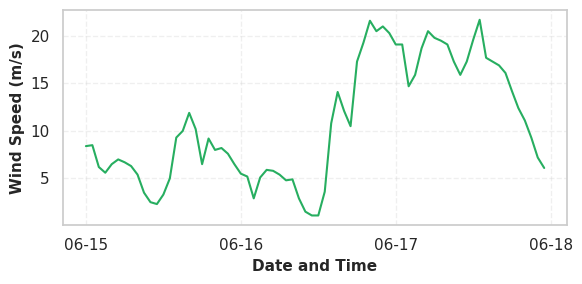

In [9]:
# Create the wind speed plot
if wind_df is not None:
    fig, ax = plt.subplots(figsize=(6, 3))
    
    ax.plot(wind_df.index, wind_df['wind_speed'].values, linewidth=1.5, color='#27AE60')
    
    ax.set_xlabel('Date and Time', fontsize=11, fontweight='bold')
    ax.set_ylabel('Wind Speed (m/s)', fontsize=11, fontweight='bold')
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Format x-axis to show dates nicely
    import matplotlib.dates as mdates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Optionally save the figure
    # fig.savefig('three_days_wind_speed.png', dpi=300, bbox_inches='tight')
else:
    print("No wind data available to plot")

## Combined Figure: All Three Time Series

Create a compact figure with all three plots as subplots for presentation.

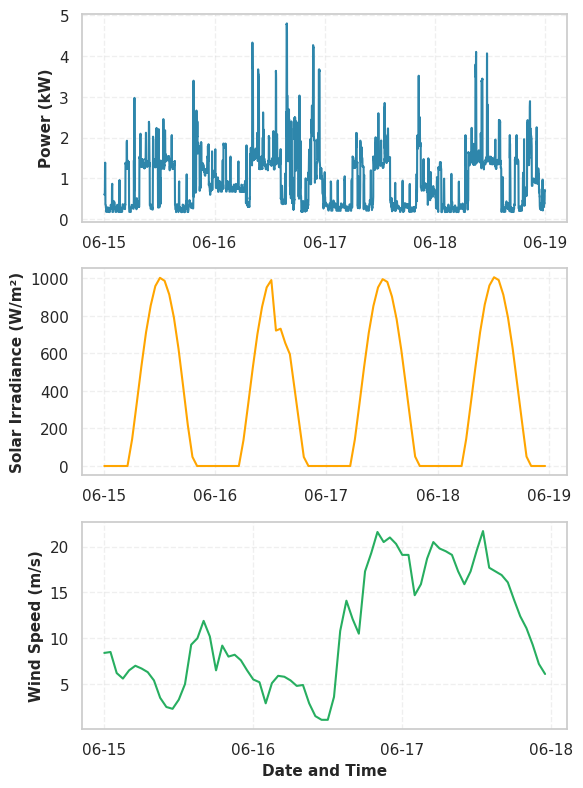

In [10]:
# Create a combined figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 8))

# Plot 1: Power Consumption
axes[0].plot(three_days.index, three_days.values, linewidth=1.5, color='#2E86AB')
axes[0].set_ylabel('Power (kW)', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
axes[0].xaxis.set_major_locator(mdates.DayLocator())

# Plot 2: Solar Irradiance
axes[1].plot(solar_three_days.index, solar_three_days.values, linewidth=1.5, color='#FFA500')
axes[1].set_ylabel('Solar Irradiance (W/m²)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
axes[1].xaxis.set_major_locator(mdates.DayLocator())

# Plot 3: Wind Speed
if wind_df is not None:
    axes[2].plot(wind_df.index, wind_df['wind_speed'].values, linewidth=1.5, color='#27AE60')
    axes[2].set_ylabel('Wind Speed (m/s)', fontsize=11, fontweight='bold')
    axes[2].set_xlabel('Date and Time', fontsize=11, fontweight='bold')
    axes[2].grid(True, alpha=0.3, linestyle='--')
    axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    axes[2].xaxis.set_major_locator(mdates.DayLocator())

plt.tight_layout()
plt.show()

# Optionally save the figure
# fig.savefig('combined_three_days.png', dpi=300, bbox_inches='tight')

## Educational Figure: What is a Time Series?

Visualize a single day of solar irradiance to illustrate the concept of a time series with discrete time steps.

In [11]:
# Select one day of solar irradiance data
one_day = solar_three_days.loc['2020-06-15']

print(f"One day of data: {len(one_day)} hourly measurements")
print(f"From {one_day.index[0]} to {one_day.index[-1]}")

One day of data: 24 hourly measurements
From 2020-06-15 00:09:00 to 2020-06-15 23:09:00


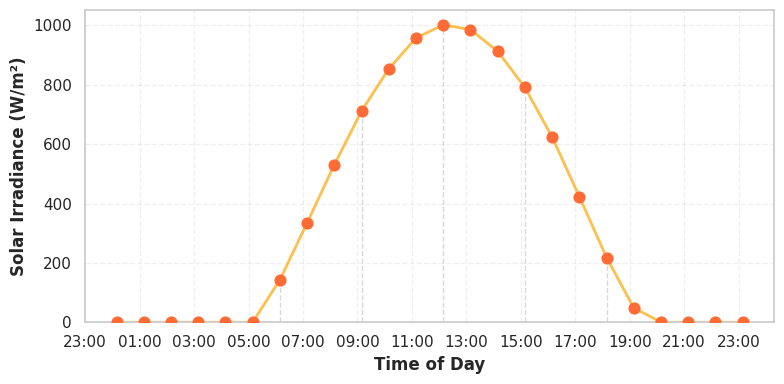

In [13]:
# Create an educational figure showing discrete time steps
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the line connecting the points
ax.plot(one_day.index, one_day.values, linewidth=2, color='#FFA500', alpha=0.7)

# Highlight individual time steps with markers
ax.scatter(one_day.index, one_day.values, s=60, color='#FF6B35', zorder=5)

# Add vertical lines from x-axis to points for emphasis (only for every 3rd point to avoid clutter)
for i in range(0, len(one_day), 3):
    ax.vlines(one_day.index[i], 0, one_day.values[i], 
              colors='gray', linestyles='dashed', alpha=0.3, linewidth=1)

ax.set_xlabel('Time of Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Solar Irradiance (W/m²)', fontsize=12, fontweight='bold')

# Format x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.xticks(rotation=0)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Set y-axis to start from 0
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

# Optionally save the figure
# fig.savefig('time_series_concept.png', dpi=300, bbox_inches='tight')